# Buy and sell the next day
1. Buy the stock on the fourth day open, if the stock closes down consecutively for three days.
2. Exit on the next day open.
3. Optional: Optimise the strategy by exiting the long position on the same day close.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import pyfolio as pf
import datetime as dt
from get_data import get_data
warnings.filterwarnings('ignore')

In [8]:
def buy_sell(df):
    
    df['oo_returns']= np.log(df['open']/df['open'].shift(1)) #we'll buy at opena nd sell at next day open thus calculating OO returns
    df['cc_returns']= np.log(df['close']/df['close'].shift(1))
    
    df['signal']= np.where((df['close'].shift(1) <df['open'].shift(1)) & \
                           (df['close'].shift(2) <df['open'].shift(2)) & \
                           (df['close'].shift(3) <df['open'].shift(3)), 1,0) #We are standing on 4th Day, checking price movement of last 3 days
    
    df['position']= df['signal'] #here if the signal cotinutes for consicutive days, so will the position but we need to square off next day thus the following code
    df.position= np.where(df.position.shift(1)==1,0,df.position)
    df.position= np.where(df.position.shift(2)==1,0,df.position)
    df.position= np.where(df.position.shift(3)==1,0,df.position) #Once the position is taken, next morning it is squared off and for next 3 days the strategy should again be tested before taking a new position
    
    df['strategy_returns']= df.position*df.oo_returns
    
    print('the strategy returns are: ', np.round(df.strategy_returns.cumsum()[-1],2), ' and buy and hold returns are: ', np.round(df.cc_returns.cumsum()[-1],2) )
    
    df[['cc_returns','strategy_returns']].cumsum().plot(figsize=(15,6), grid= True)
    plt.show()
    
    return df
    

In [13]:
df= get_data('AMZN','2012-1-1','2020-1-1')

[*********************100%***********************]  1 of 1 completed


the strategy returns are:  -1.22  and buy and hold returns are:  2.33


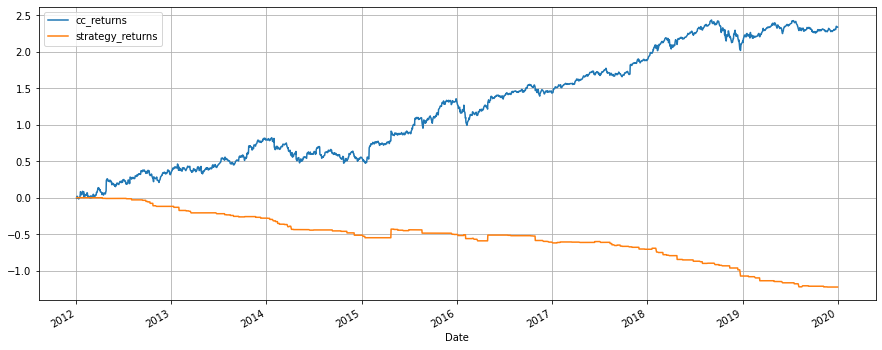

In [14]:
df=buy_sell(df)

The strategy is clearly not working therefore we will either try this with different lookbacl of down days, different assets, or different bar size. 